In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("data/new_cleaned.csv")

In [2]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [3]:
from sklearn.model_selection import train_test_split

# Split into input and output variables
# #'Pos_0', 'Pos_1', 'Pos_2', 'Pos_3', 'Pos_4', 'Season_2011', 'Season_2012', 'Season_2013', 'Season_2014', 'Season_2015', 'Season_2016', 'Season_2017', 'Season_2018', 'Season_2019', 'Season_2020', 'Season_2021', 'Age', 'BLK', 'ORB', 'STL', 'DRB', 'TRB'], axis=1)
X = df.drop(['Performance1', 'Performance2', 'PLAY_PTS'], axis=1)
y = df['Performance2']

# Split data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1010110011)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1010110011)

In [4]:
from sklearn.linear_model import LogisticRegression

# Create logistic regression model with L2 regularization and balanced class weights
logreg = LogisticRegression(penalty='l2', C=1, solver='lbfgs', class_weight='balanced', max_iter=10000)

# Fit the model to the training data
logreg.fit(X_train, y_train)

# Evaluate the model on the validation data
y_pred = logreg.predict(X_val)
accuracy = logreg.score(X_val, y_val)
print(f"Accuracy: {accuracy}")

Accuracy: 0.5087719298245614


In [5]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# calculate predicted probabilities
y_pred_proba = logreg.predict_proba(X_val)[:, 1]

# calculate predicted classes
y_pred = logreg.predict(X_val)

# calculate confusion matrix
confusion_matrix = confusion_matrix(y_val, y_pred)
print(f"Confusion Matrix:\n{confusion_matrix}")

# calculate precision, recall, and f1-score
report = classification_report(y_val, y_pred)
print(f"Classification Report:\n{report}")

# calculate false positive rate, true positive rate, and threshold values for ROC curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
# calculate AUC
auc_value = auc(fpr, tpr)
print(f"AUC: {auc_value}")

Confusion Matrix:
[[19 23]
 [ 5 10]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.45      0.58        42
           1       0.30      0.67      0.42        15

    accuracy                           0.51        57
   macro avg       0.55      0.56      0.50        57
weighted avg       0.66      0.51      0.53        57

AUC: 0.580952380952381


In [6]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras import regularizers
from sklearn.metrics import f1_score
import os

# Define model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=25, activation='relu', kernel_regularizer=regularizers.l2(0.02), input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(units=15, activation='relu', kernel_regularizer=regularizers.l2(0.02)),   
    tf.keras.layers.Dense(units=5, activation='relu', kernel_regularizer=regularizers.l2(0.02)),   
    tf.keras.layers.Dense(units=2, activation='sigmoid')
])

# Define optimizer with learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# Compile model with optimizer
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=100, batch_size=20, validation_data=(X_val, y_val))

2023-03-08 14:17:43.477158: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-08 14:17:51.577293: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/100
12/12 [==============================] - 1s 24ms/step - loss: 1.7395 - accuracy: 0.6384 - val_loss: 1.6585 - val_accuracy: 0.7368
Epoch 2/100
12/12 [==============================] - 0s 6ms/step - loss: 1.6444 - accuracy: 0.6429 - val_loss: 1.5692 - val_accuracy: 0.7368
Epoch 3/100
12/12 [==============================] - 0s 6ms/step - loss: 1.5585 - accuracy: 0.6384 - val_loss: 1.4868 - val_accuracy: 0.7368
Epoch 4/100
12/12 [==============================] - 0s 5ms/step - loss: 1.4788 - accuracy: 0.6384 - val_loss: 1.4072 - val_accuracy: 0.7368
Epoch 5/100
12/12 [==============================] - 0s 5ms/step - loss: 1.4062 - accuracy: 0.6384 - val_loss: 1.3345 - val_accuracy: 0.7368
Epoch 6/100
12/12 [==============================] - 0s 5ms/step - loss: 1.3408 - accuracy: 0.6384 - val_loss: 1.2757 - val_accuracy: 0.7368
Epoch 7/100
12/12 [==============================] - 0s 5ms/step - loss: 1.2808 - accuracy: 0.6384 - val_loss: 1.2168 - val_accuracy: 0.7368
Epoch 8/100


In [7]:
# Evaluate model on test data
y_pred = model.predict(X_test)
test_loss, test_acc = model.evaluate(X_test, y_test)
f1 = f1_score(y_test, y_pred.argmax(axis=1), average='weighted')

# Print model performance metrics
print(f"Test loss: {test_loss:.4f}")
print(f"Test accuracy: {test_acc:.4f}")
print(f"F1 score: {f1:.4f}")

3/3 [==============================] - 0s 2ms/step - loss: 0.6454 - accuracy: 0.6901
Test loss: 0.6454
Test accuracy: 0.6901
F1 score: 0.6599


3/3 [==============================] - 0s 2ms/step


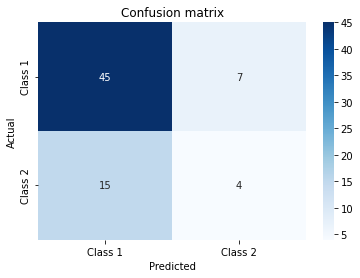

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Use the model to predict the class of each test observation
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Class 1', 'Class 2'], yticklabels=['Class 1', 'Class 2'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix')
plt.show()

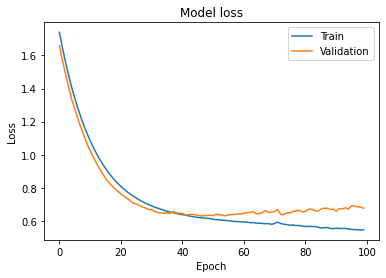

In [9]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

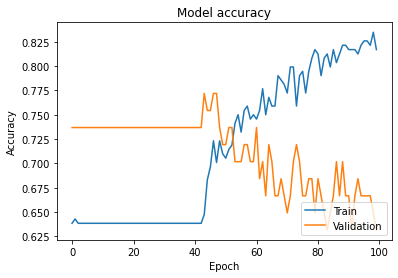

In [10]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()